# Eigen Faces
dataset : https://conradsanderson.id.au/lfwcrop/

In [2]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [3]:
path = "lfwcrop_grey/faces"
if not os.path.exists(path):
  ! wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
  ! unzip lfwcrop_grey.zip

In [106]:
from matplotlib import image

X_faces = []

filelist = np.array(glob.glob(os.path.join(path, "*.pgm"))) # 

for data_img in filelist:
    img = image.imread(data_img)
    flatten_img = img.flatten()
    X_faces.append(flatten_img)
    
X_faces = np.array(X_faces)

# Principal Componant analysis (PCA)

In [5]:
# covariance matrix calculated in a loop 
#(sum of outer vector products of the centered data points)
def covariance_matrix(X):
    num_samples, _ = X.shape
    mu = np.mean(X, axis=0)
    X_centered = X - mu
    return X_centered.T.dot(X_centered) / num_samples

In [6]:
class PCA:
    
    def __init__(self, num_components):
        self.num_components = num_components
        
    def fit(self, X):
        Xcov = covariance_matrix(X)
        eigh_val_, eigh_vec_ = np.linalg.eigh(Xcov)
        #eigh output in ascending order
        eigh_vec_desc = np.flip(eigh_vec_, axis=1)
        self.components = eigh_vec_desc[:, :self.num_components]
        
    def transform(self, X):
        self.fit(X)
        return np.dot(X, self.components)

# First 20 eigenfaces

In [107]:
num_eigenfaces = 20

pca_faces = PCA(num_eigenfaces)
pca_faces.fit(X_faces)

In [108]:
eigen_faces = pca_faces.components.T.reshape(20,64,64)

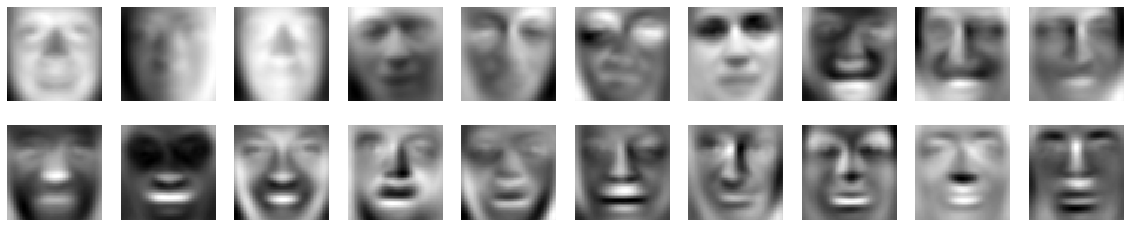

In [109]:
fig = plt.figure(figsize=(20, 4))

for i in range(num_eigenfaces):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(eigen_faces[i], cmap=plt.cm.gray)
    plt.axis('off')
plt.show()